In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io

In [101]:
df_cr = pd.read_csv('data/Clean_Mortgage_Lending_FL_PortSL.csv')

In [102]:
df_cr.head()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
0,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,30%-<36%,Older,Rich,< Conventional Bar
1,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,36%-<50%,Middle-Aged,Upper-Middle Class,> Conventional Bar and < FHA Bar
2,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,36%-<50%,Middle-Aged,Middle Class,< Conventional Bar
3,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,20%-<30%,Middle-Aged,Middle Class,< Conventional Bar
4,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,20%-<30%,Older,Upper-Middle Class,< Conventional Bar


In [103]:
df_cr.tail()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
10601,Not Hispanic or Latino,Asian,Male,0,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,50%-60%,Middle-Aged,Upper-Middle Class,> Conventional Bar and < FHA Bar
10602,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,20%-<30%,Middle-Aged,Upper-Middle Class,< Conventional Bar
10603,Not Hispanic or Latino,White,Male,0,No Preapproval Requested,VA-guaranteed,Home Purchase,No Interest-only Payments,No Balloon Payment,>60%,Middle-Aged,Middle Class,Not Eligible
10604,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,20%-<30%,Middle-Aged,Middle Class,< Conventional Bar
10605,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,20%-<30%,Older,Upper-Middle Class,> Conventional Bar and < FHA Bar


# Categorical Features Data Cleaning

### ethnicity 

In [104]:
pd.unique(df_cr['ethnicity'])

array(['Not Hispanic or Latino', 'Hispanic or Latino'], dtype=object)

In [105]:
df_cr['ethnicity'].mask((df_cr['ethnicity'] == "Hispanic or Latino"), 1, inplace=True)
df_cr['ethnicity'].mask((df_cr['ethnicity'] == "Not Hispanic or Latino"), 0, inplace=True)

In [106]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

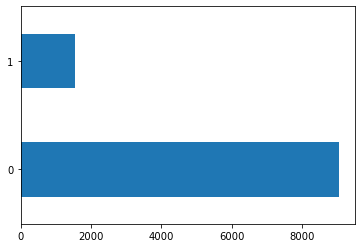

In [107]:
# explore is_not_hispanic category
df_cr["ethnicity"].value_counts().plot(kind='barh')

### race

In [108]:
pd.unique(df_cr['race'])

array(['White', 'Black or African American', 'Asian', 'Minority Races'],
      dtype=object)

In [109]:
df_cr['race'].mask((df_cr['race'] == "White"), 1, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Asian"), 2, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Black or African American"), 3, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Minority Races"), 4, inplace=True)

In [110]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

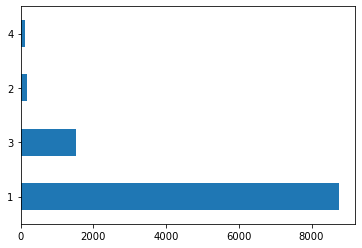

In [111]:
# explore derived_race category
df_cr["race"].value_counts().plot(kind='barh')

### gender


In [112]:
pd.unique(df_cr['gender'])

array(['Male', 'Female'], dtype=object)

In [113]:
df_cr['gender'].mask((df_cr['gender'] == "Male"), 1, inplace=True)
df_cr['gender'].mask((df_cr['gender'] == "Female"), 0, inplace=True)

<AxesSubplot:>

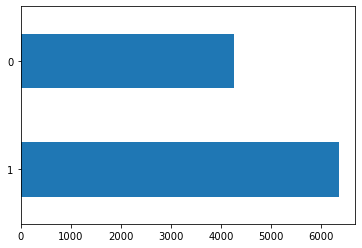

In [114]:
# explore is_male category
df_cr["gender"].value_counts().plot(kind='barh')

### age

In [115]:
pd.unique(df_cr['age'])

array(['Older', 'Middle-Aged', 'Young'], dtype=object)

In [116]:
df_cr['age'].mask((df_cr['age'] == "Young"), 1, inplace=True)
df_cr['age'].mask((df_cr['age'] == "Middle-Aged"), 2, inplace=True)
df_cr['age'].mask((df_cr['age'] == "Older"),3, inplace=True)

<AxesSubplot:>

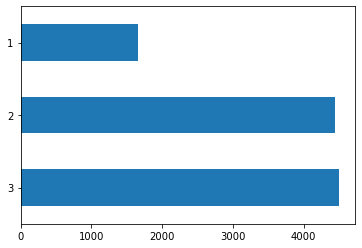

In [117]:
# explore applicant_age category
df_cr["age"].value_counts().plot(kind='barh')

### preapproval_requested

In [118]:
pd.unique(df_cr["preapproval_requested"])

array(['No Preapproval Requested', 'Preapproval Requested'], dtype=object)

In [119]:
df_cr['preapproval_requested'].mask((df_cr['preapproval_requested'] == "Preapproval Requested"), 1, inplace=True)
df_cr['preapproval_requested'].mask((df_cr['preapproval_requested'] == "No Preapproval Requested"), 0, inplace=True)

<AxesSubplot:>

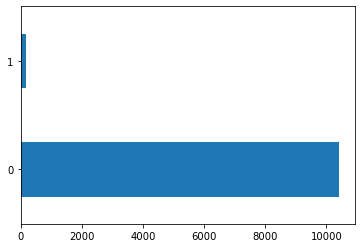

In [120]:
# explore preapproval_requested category
df_cr["preapproval_requested"].value_counts().plot(kind='barh')

### loan_type 

1. Conventional 
2. FHA-insured 
3. VA-guaranteed

In [121]:
pd.unique(df_cr['loan_type'])

array(['Converntional', 'VA-guaranteed', 'FHA-insured'], dtype=object)

In [122]:
df_cr['loan_type'].mask((df_cr['loan_type'] == "Converntional"), 1, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == "FHA-insured"), 2, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == "VA-guaranteed"), 3, inplace=True)

<AxesSubplot:>

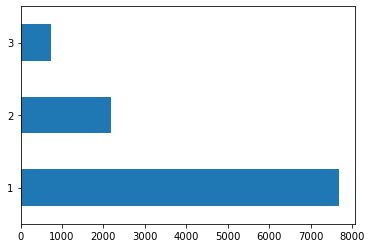

In [123]:
# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

### loan_purpose 
1. Home Purchase
2. Home Improvement 
3. Refinancing 
4. Other Purpose 

In [124]:
pd.unique(df_cr['loan_purpose'])

array(['Home Purchase', 'Refinancing', 'Home Improvement',
       'Other Purpose'], dtype=object)

In [125]:
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Home Purchase"), 1, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Home Improvement"), 2, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Refinancing"), 3, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Other Purpose"), 4, inplace=True)

<AxesSubplot:>

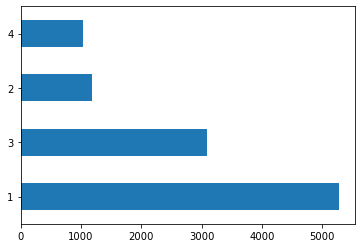

In [126]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

### interest_only_payment 
1. Interest-only Payments
2. No Interest-only Payments


In [127]:
pd.unique(df_cr['interest_only_payment'])

array(['No Interest-only Payments', 'Interest-only Payments'],
      dtype=object)

In [128]:
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == "Interest-only Payments"), 1, inplace=True)
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == "No Interest-only Payments"), 2, inplace=True)

<AxesSubplot:>

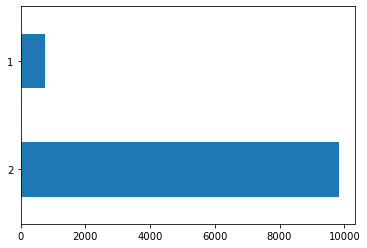

In [129]:
# explore interest_only_payment category
df_cr["interest_only_payment"].value_counts().plot(kind='barh')

### balloon_payment 
1. Balloon Payment
2. No Balloon Payment 

In [130]:
pd.unique(df_cr['balloon_payment'])

array(['No Balloon Payment', 'Balloon Payment'], dtype=object)

In [131]:
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == "Balloon Payment"), 1, inplace=True)
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == "No Balloon Payment"), 2, inplace=True)

<AxesSubplot:>

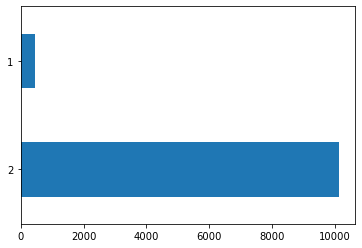

In [132]:
# explore balloon_payment category
df_cr["balloon_payment"].value_counts().plot(kind='barh')

### debt_to_income_ratio 
Description: The ratio, as a percentage, of the applicant’s or borrower’s total monthly debt to the total monthly income relied on in making the credit decision
1. <20%
2. 20%-<30%
3. 30%-<36%
4. 36%-<50%
5. 50%-60% 
6. ->60%

In [133]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['30%-<36%', '36%-<50%', '20%-<30%', '50%-60%', '>60%', '<20%'],
      dtype=object)

In [134]:
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "<20%"), 1, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "20%-<30%"), 2, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "30%-<36%"), 3, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "36%-<50%"), 4, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "50%-60%"), 5, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == ">60%"), 6, inplace=True)

In [135]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

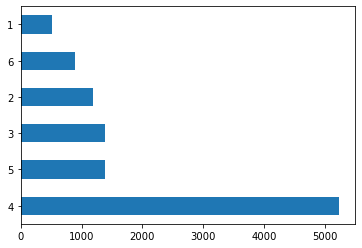

In [136]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

### loan_to_value_ratio 
1. Conventional Bar - 80% or less
2. FHA Bar - 96.5% or less
3. VA Bar - 100% or less
4. Not Eligible - 100% (resource: https://www.forbes.com/advisor/mortgages/loan-to-value-ratio/)

In [137]:
pd.unique(df_cr["loan_to_value_ratio"])

array(['< Conventional Bar', '> Conventional Bar and < FHA Bar',
       '> FHA Bar and < VA Bar', 'Not Eligible'], dtype=object)

In [138]:
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "< Conventional Bar"), 1, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "> FHA Bar and < VA Bar"), 2, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "> Conventional Bar and < FHA Bar"), 3, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "Not Eligible"), 4, inplace=True)

In [139]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

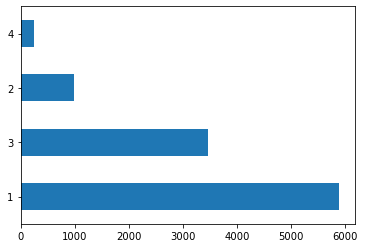

In [140]:
# explore loan_to_value_ratio category
df_cr["loan_to_value_ratio"].value_counts().plot(kind='barh')

### income 
1. Rich
2. Upper-Middle Class
3. Middle Class
4. Lower-Middle Class
5. Poor and Near Poor

In [141]:
pd.unique(df_cr["income"])

array(['Rich', 'Upper-Middle Class', 'Middle Class', 'Lower-Middle Class',
       'Poor and Near Poor'], dtype=object)

In [142]:
df_cr['income'].mask((df_cr['income'] == "Rich"), 1, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Upper-Middle Class"), 2, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Middle Class"), 3, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Lower-Middle Class"), 4, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Poor and Near Poor"), 5, inplace=True)

In [143]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

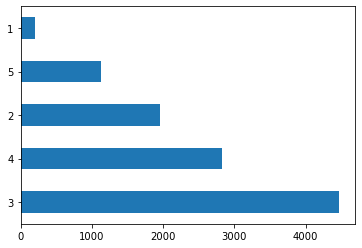

In [144]:
# explore income category
df_cr["income"].value_counts().plot(kind='barh')

In [145]:
df_cr.head()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
0,0,1,1,1,0,1,1,2,2,3,3,1,1
1,0,1,1,1,0,1,1,2,2,4,2,2,3
2,0,1,0,1,0,1,1,2,2,4,2,3,1
3,0,1,0,1,0,1,3,2,2,2,2,3,1
4,0,1,0,1,0,1,1,2,2,2,3,2,1


In [146]:
df_cr.tail()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
10601,0,2,1,0,0,1,1,2,2,5,2,2,3
10602,0,1,1,1,0,1,1,2,2,2,2,2,1
10603,0,1,1,0,0,3,1,2,2,6,2,3,4
10604,0,1,0,1,0,1,3,2,2,2,2,3,1
10605,0,1,1,1,0,1,3,2,2,2,3,2,3


In [147]:
df_cr.to_csv('data/Fairlearn_FL_PortSL.csv', index = False)